# Question 1

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


# Hierarchical Clustering

In [2]:
# Importing libraries for Heirarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.rename(columns={'Unnamed: 0':'State'},inplace=True)
crime

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
# Normalizing Function

def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [6]:
crime1=crime.set_index('State')
crime1.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
crime.sample(5)

,State,Murder,Assault,UrbanPop,Rape
39,South Carolina,14.4,279,48,22.5
29,New Jersey,7.4,159,89,18.8
20,Massachusetts,4.4,149,85,16.3
47,West Virginia,5.7,81,39,9.3
22,Minnesota,2.7,72,66,14.9


In [8]:
norm_crime=norm_func(crime1)
norm_crime

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465
Colorado,0.427711,0.544521,0.779661,0.811370
Connecticut,0.150602,0.222603,0.762712,0.098191
Delaware,0.307229,0.660959,0.677966,0.219638
Florida,0.879518,0.993151,0.813559,0.635659


In [9]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import numpy as np
#df = pd.read_csv('your_file.csv')

X = norm_crime[['Murder','Assault','UrbanPop','Rape']].values
Z = linkage(X, method='ward')

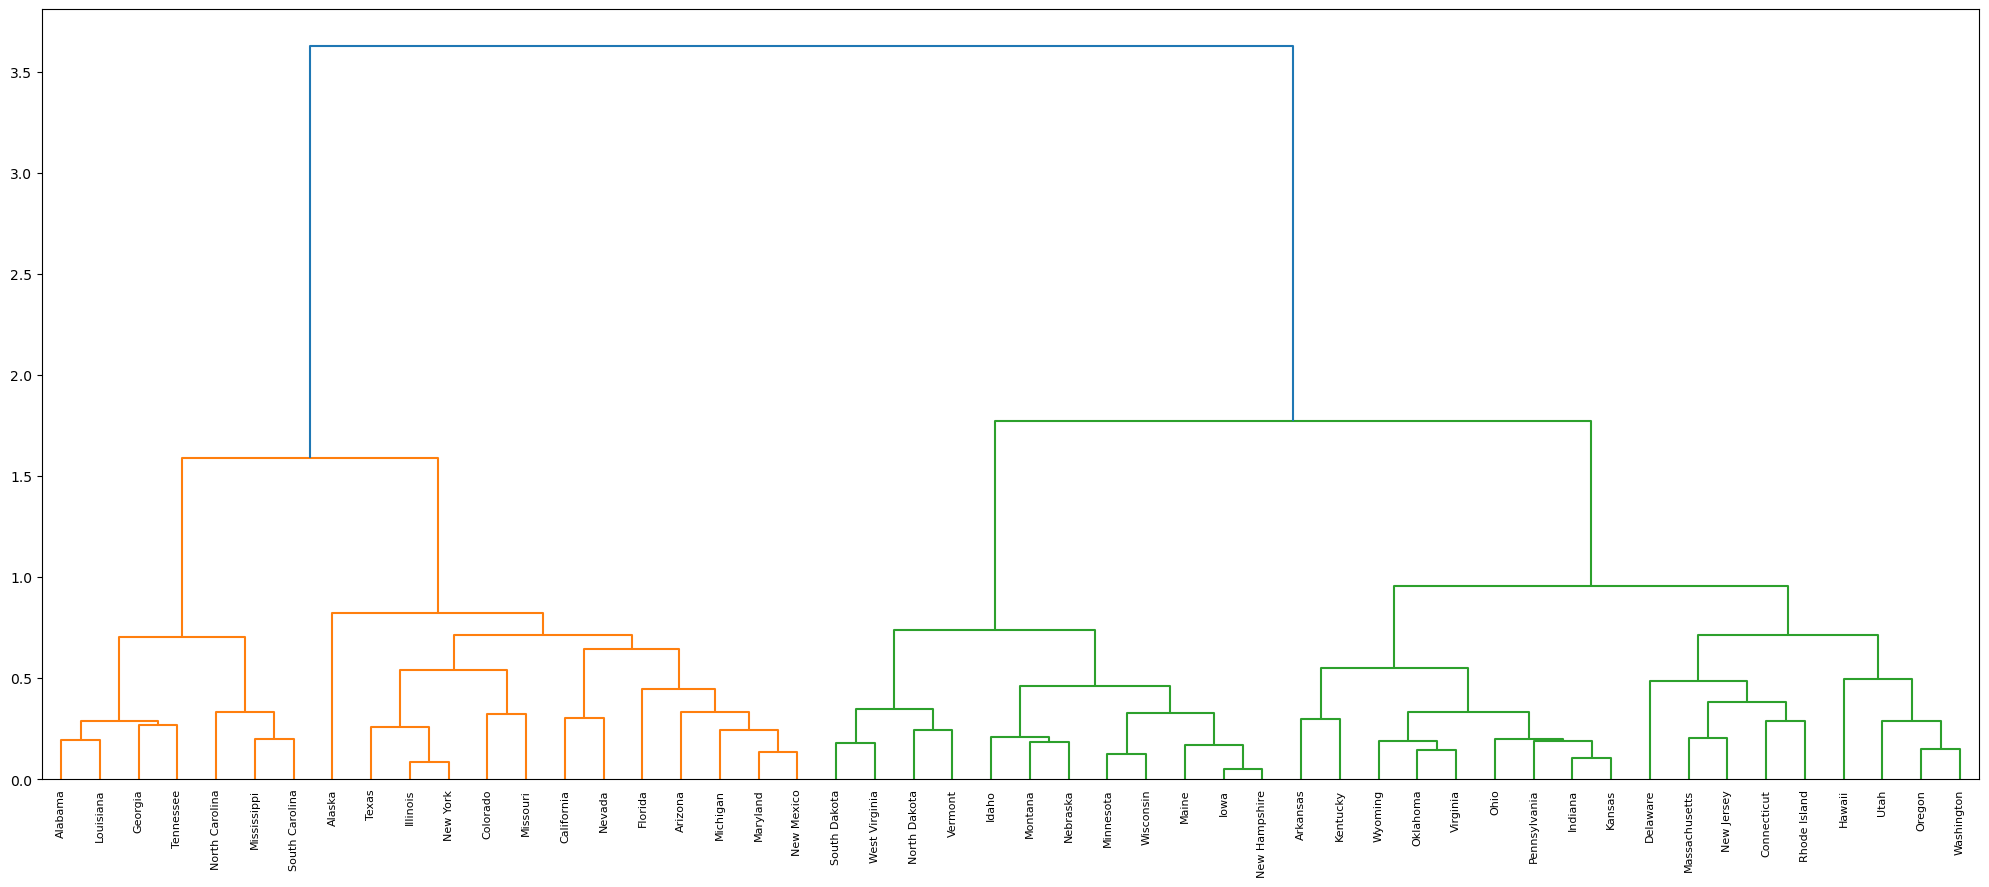

In [10]:
plt.figure(figsize=(25,10))
dendrogram(Z, labels=crime['State'].values)
plt.show()

In [24]:
from sklearn.metrics import silhouette_score as sil
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['ward','single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = linkages)
        y = hc.fit_predict(norm_crime)
        sc=sil(norm_crime,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = ward, Sc score = 0.42364457559625074
Clusters = 2, linkage = single, Sc score = 0.21033337025958493
Clusters = 2, linkage = average, Sc score = 0.42364457559625074
Clusters = 2, linkage = complete, Sc score = 0.42364457559625074

Clusters = 3, linkage = ward, Sc score = 0.3191691542812128
Clusters = 3, linkage = single, Sc score = 0.14223288708185458
Clusters = 3, linkage = average, Sc score = 0.35149572430421583
Clusters = 3, linkage = complete, Sc score = 0.30877213909512063

Clusters = 4, linkage = ward, Sc score = 0.3298707379986785
Clusters = 4, linkage = single, Sc score = -0.16741191954744025
Clusters = 4, linkage = average, Sc score = 0.3699239114027717
Clusters = 4, linkage = complete, Sc score = 0.30607294424263076

Clusters = 5, linkage = ward, Sc score = 0.2829012429325644
Clusters = 5, linkage = single, Sc score = -0.18215418215195153
Clusters = 5, linkage = average, Sc score = 0.32574781342555276
Clusters = 5, linkage = complete, Sc score = 0.30563

In [25]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [26]:
hc.fit(norm_crime)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [28]:
y_hc=hc.fit_predict(norm_crime)
y_hc


array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [29]:
crime['heirarchy_cluster']=y_hc
crime

,State,Murder,Assault,UrbanPop,Rape,heirarchy_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [34]:
crime.groupby(["heirarchy_cluster"])["State"].apply(lambda x:tuple(x))

heirarchy_cluster
0    (Alabama, Alaska, Georgia, Louisiana, Mississi...
1    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
3    (Arizona, California, Colorado, Florida, Illin...
Name: State, dtype: object

In [39]:
crime=crime.set_index('State')

In [40]:
crime1=crime.sort_values('heirarchy_cluster')
crime1.iloc[:,[-1]]

,heirarchy_cluster
State,
Alabama,0
Louisiana,0
Mississippi,0
North Carolina,0
South Carolina,0
Georgia,0
Alaska,0
Tennessee,0
Utah,1


# K-Means Clustering

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples,silhouette_score

In [42]:
crime.head()

,Murder,Assault,UrbanPop,Rape,heirarchy_cluster
State,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3


In [43]:
scaler=StandardScaler()
crime_scaled=scaler.fit_transform(crime.iloc[:,1:])
x=crime_scaled

In [44]:
nc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
    kmeans.fit(x)
    nc.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow graph')

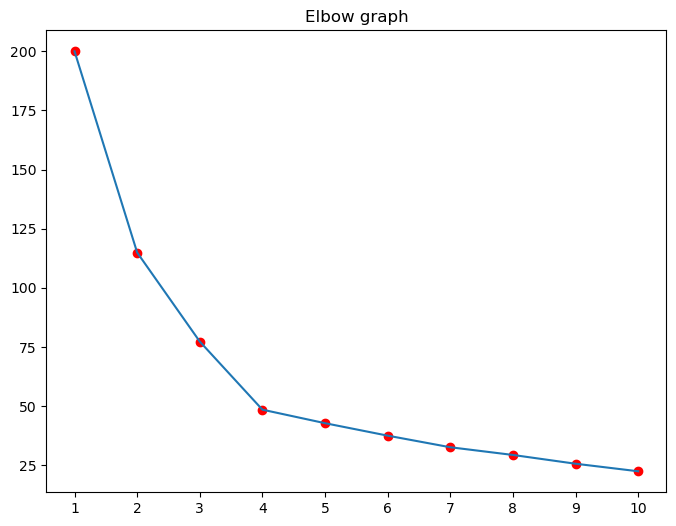

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1,11),nc)
plt.scatter(range(1,11),nc,color='red')
plt.xticks(range(1,11))
plt.title('Elbow graph')

In [48]:
clustered=KMeans(n_clusters=4,init='k-means++',random_state=10)
clustered.fit(x)

KMeans(n_clusters=4, random_state=10)

In [49]:
clustered.labels_

array([0, 0, 1, 0, 1, 1, 3, 3, 1, 0, 3, 2, 1, 3, 2, 3, 2, 0, 2, 1, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 3, 0, 2, 0, 1, 3,
       2, 3, 3, 2, 3, 3])

In [50]:
crime['cluster_id']=clustered.labels_

In [51]:
crime.groupby(['cluster_id']).agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape,heirarchy_cluster
,,mean,mean,mean,mean,mean
0,0,13.500000,245.777778,53.111111,23.977778,0.111111
1,1,10.883333,256.916667,78.333333,32.250000,3.000000
2,2,3.772727,81.454545,49.545455,12.054545,1.909091
3,3,5.322222,130.388889,73.000000,18.122222,1.000000


In [52]:
for i in np.array([0,1,2,3]):
    print('States that belong to cluster index',i)
    print(crime[crime['cluster_id']==i])
    print('\n')

States that belong to cluster index 0
                Murder  Assault  UrbanPop  Rape  heirarchy_cluster  cluster_id
State                                                                         
Alabama           13.2      236        58  21.2                  0           0
Alaska            10.0      263        48  44.5                  0           0
Arkansas           8.8      190        50  19.5                  1           0
Georgia           17.4      211        60  25.8                  0           0
Louisiana         15.4      249        66  22.2                  0           0
Mississippi       16.1      259        44  17.1                  0           0
North Carolina    13.0      337        45  16.1                  0           0
South Carolina    14.4      279        48  22.5                  0           0
Tennessee         13.2      188        59  26.9                  0           0


States that belong to cluster index 1
            Murder  Assault  UrbanPop  Rape  heirarch

# DBSCAN

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
crime=pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [63]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:>

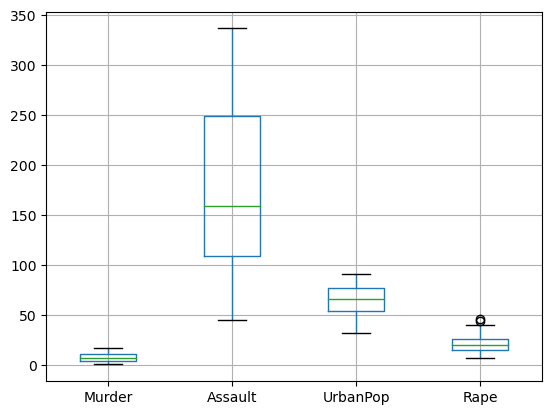

In [68]:
crime.boxplot()

In [75]:
crime1=crime.drop(['Unnamed: 0'],axis=1)
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [74]:
array=crime1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [76]:
norm_crime=StandardScaler().fit(array)
x=norm_crime.transform(array)

In [77]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [97]:
dbscan=DBSCAN(eps=1,min_samples=3)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=3)

In [98]:
#noisy samples are given the lable as -1
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [99]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1.head(10)

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [100]:
clustered=pd.concat([crime,c1],axis=1)
clustered.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [101]:
clustered[clustered['cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
24,Missouri,9.0,178,70,28.2,1


In [102]:
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster       0.660
dtype: float64

In [113]:
clustered.sort_values('cluster')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
32,North Carolina,13.0,337,45,16.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
10,Hawaii,5.3,46,83,20.2,-1
27,Nevada,12.2,252,81,46.0,-1


In [114]:
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster       0.660
dtype: float64

four clusters obtained.

# Question 2

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [11]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering

In [12]:
#converted XLSX file to CSV file
df=pd.read_csv("EWA1.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
df.head(20)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [15]:
df1=df.drop(['ID#'],axis=1)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
# Normalizing Function

def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [17]:
norm_airline=norm_func(df1)
norm_airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


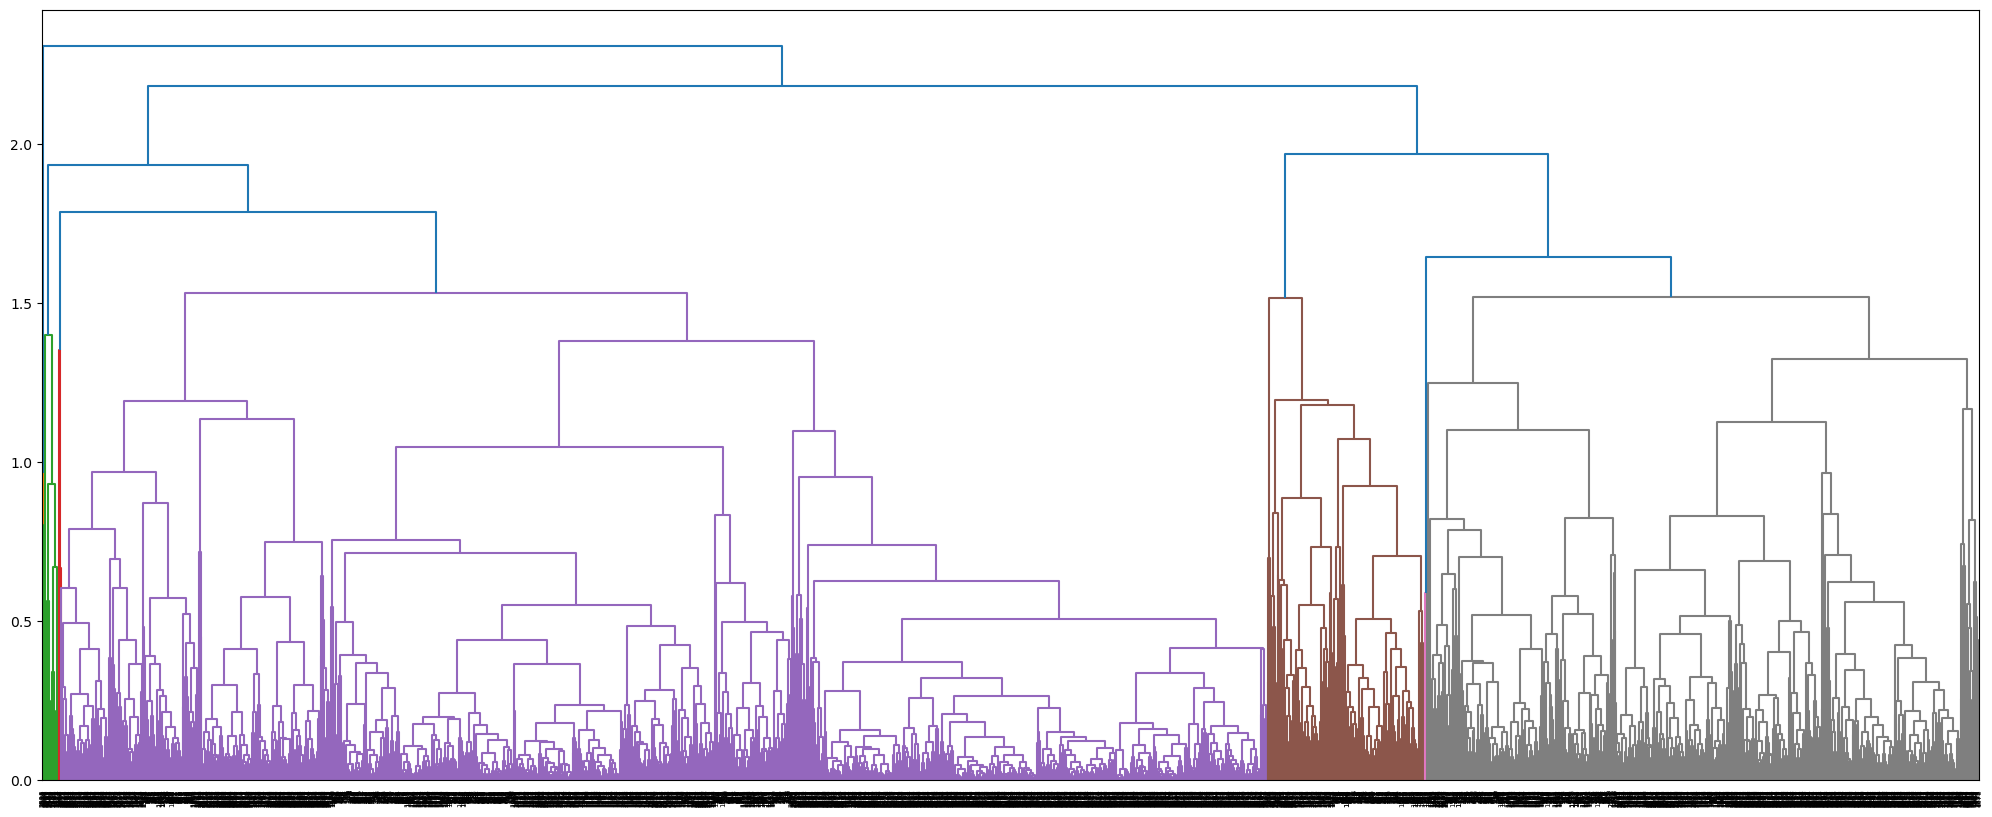

In [20]:
# Creating Dendrograms
plt.figure(figsize=(25, 10))  
dendograms=sch.dendrogram(sch.linkage(norm_airline,'complete'))

In [115]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [117]:
y=pd.DataFrame(hclusters.fit_predict(norm_airline),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [126]:
# Adding clusters to dataset
df1['clustersid']=hclusters.labels_
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [127]:
df1.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


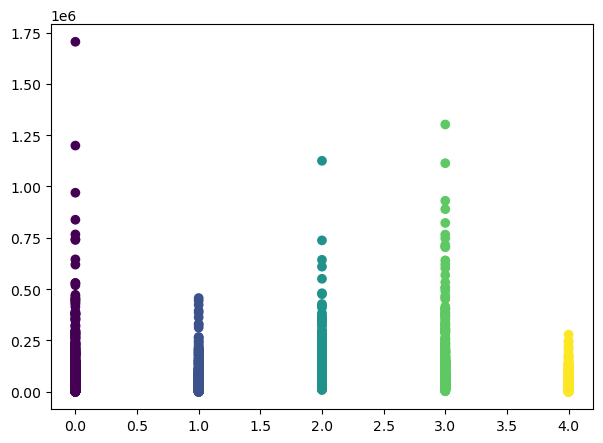

In [129]:
# Plot Clusters
plt.figure(figsize=(7, 5))  
plt.scatter(df1['clustersid'],df1['Balance'], c=hclusters.labels_) 

# K-Means

In [132]:
airline_df=pd.read_csv('EWA1.csv')
airline_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [135]:
airline_df2=airline_df.drop(['ID#'],axis=1)
airline_df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [136]:
airline_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [137]:
airline_df2.isnull()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False


In [138]:
from sklearn.cluster import KMeans

In [139]:
# Standardisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [141]:
scaled_airline_df2=scaler.fit_transform(airline_df2.iloc[:,0:])
scaled_airline_df2

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [142]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_airline_df2)

In [143]:
predict

array([1, 1, 1, ..., 0, 1, 1])

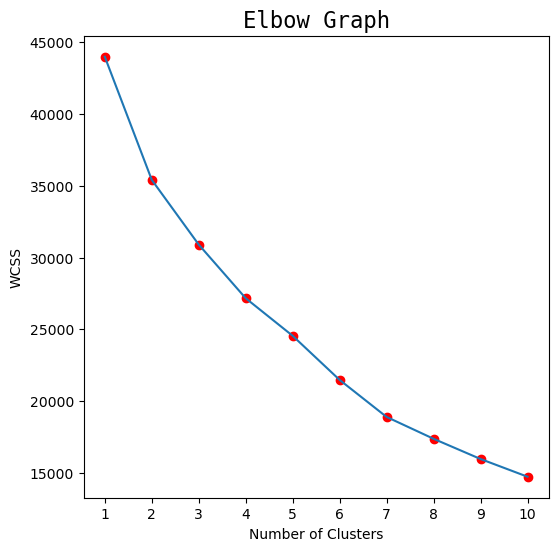

In [145]:
# Plotting the Elbow-Graph

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
    kmeans.fit(scaled_airline_df2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color='r')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Graph',family='monospace',fontsize=16)
plt.show()


In [146]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_airline_df2)

KMeans(n_clusters=5, random_state=42)

In [147]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [149]:
#Assign clusters ti the data set
airline_df2['clusterid_new']=clusters_new.labels_
airline_df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [150]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 1.13984539,  1.05672065,  0.09776869, -0.09824189, -0.06276658,
         0.57151541,  1.51103346,  3.44127553,  3.6610428 ,  0.27107706,
         0.88975067],
       [-0.29035586, -0.05818754, -0.59651518, -0.09824189, -0.06074586,
        -0.51420592, -0.49040819, -0.18783605, -0.19980876, -0.20213465,
        -0.34539972],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.43260424, -0.01954084,  1.22083157, -0.09824189, -0.05447771,
         0.94096329,  0.75568144, -0.09151819, -0.10212979,  0.37689814,
         0.58013031],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [151]:
airline_df2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,188455.641176,961.558824,2.194118,1.000000,1.000000,30945.770588,26.111765,5277.958824,15.258824,4678.300000,0.800000
1,1,44293.077409,98.530806,1.237362,1.000000,1.000395,4722.390205,6.885861,196.838468,0.614929,3699.326619,0.202607
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,3,117119.906376,130.094431,3.736077,1.000000,1.001614,39793.209040,18.843422,332.092010,0.987086,4897.692494,0.651332
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [154]:
airline_df2[airline_df2['clusterid_new']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,0
22,20584,0,1,1,1,3450,11,3450,11,6884,0,0
42,60313,0,1,1,1,10000,26,3250,9,7829,1,0
50,108137,0,1,1,1,6368,5,6368,5,6844,0,0
65,53914,0,3,1,1,33767,45,5550,29,6826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,0
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,0
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,0
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,0


In [155]:
airline_df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


# DBSCAN

In [156]:
#Import the libraries
from sklearn.cluster import DBSCAN

In [157]:
airline_data=pd.read_csv('EWA1.csv')
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [158]:
airline_data2=airline_data.drop(['ID#'],axis=1)
airline_data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [159]:
airline_data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [160]:
array=airline_data2.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [161]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [162]:
dbscan = DBSCAN(eps=2, min_samples=6)
dbscan.fit_predict(X)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [163]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [164]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [165]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [166]:
clustered = pd.concat([airline_data2,cl],axis=1)

In [167]:
clustered[clustered['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
50,108137,0,1,1,1,6368,5,6368,5,6844,0,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,-1
87,609477,0,3,1,1,21422,22,1200,8,6820,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1
3883,126167,0,5,1,1,190160,15,0,0,1612,1,-1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,-1


In [168]:
clustered.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
cluster                  0.311578
dtype: float64

five clusters obtained.